<a href="https://colab.research.google.com/github/ErickArciniega/ProyectoFinalRedesNeuronalesAvanzadas/blob/main/ProyectoFinal_RNAA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from skimage import data, filters, exposure, io, color

from PIL import Image,ImageOps, ImageDraw
import pandas as pd
import seaborn as sns

from shutil import rmtree #Limpieza de datos
import os 
import pickle
import datetime

#tensorflow
import tensorflow as tf
%load_ext tensorboard
#sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from skimage import filters, exposure, color
from sklearn.metrics import confusion_matrix
from shutil import rmtree
from google.colab import files

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
!git clone https://github.com/ErickArciniega/ProyectoFinalRedesNeuronalesAvanzadas.git

Cloning into 'ProyectoFinalRedesNeuronalesAvanzadas'...
remote: Enumerating objects: 1574, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 1574 (delta 10), reused 18 (delta 5), pack-reused 1517
Receiving objects: 100% (1574/1574), 82.16 MiB | 40.88 MiB/s, done.
Resolving deltas: 100% (163/163), done.


In [3]:
%ls

ProyectoFinalRedesNeuronalesAvanzadas/  sample_data/


In [4]:
%cd ProyectoFinalRedesNeuronalesAvanzadas/

/content/ProyectoFinalRedesNeuronalesAvanzadas


In [5]:
#paths declarados de utilidad 
dir = "/content/ProyectoFinalRedesNeuronalesAvanzadas/"
dirData = dir+'data/'
dir

'/content/ProyectoFinalRedesNeuronalesAvanzadas/'

In [6]:
os.listdir()

['LICENSE',
 'PreprocesamientoProyectoFinal.ipynb',
 'data',
 'README.md',
 '.gitignore',
 '.git']

In [7]:
#listado de Tipos de entradas
os.chdir(dirData)
listaDeEntradas = os.listdir()
listaDeEntradas

['ComponentesFotos', 'ComponentesEsquematicos']

In [8]:
#Listado de componentes foto
os.chdir(dirData+'/'+listaDeEntradas[1])
listadoComponentesFoto = os.listdir()

listadoComponentesFoto

['Ventiladores',
 'Conectores',
 'Bocinas',
 'CapacitoresElectroliticos',
 'Potenciometros',
 'Resistencias',
 'Motores',
 'Diodos',
 'Transistores',
 'CapacitorCeramico',
 'PushButton',
 'DipSwitch',
 'Baterias',
 'Circuitos Integrados',
 'LcdDisplay',
 'Fusibles',
 'Led',
 'Bobinas']

In [9]:
#listado de componentes esquematicos
os.chdir(dirData+'/'+listaDeEntradas[1])
listadoComponentesEsquematico = os.listdir()
listadoComponentesEsquematico

['Ventiladores',
 'Conectores',
 'Bocinas',
 'CapacitoresElectroliticos',
 'Potenciometros',
 'Resistencias',
 'Motores',
 'Diodos',
 'Transistores',
 'CapacitorCeramico',
 'PushButton',
 'DipSwitch',
 'Baterias',
 'Circuitos Integrados',
 'LcdDisplay',
 'Fusibles',
 'Led',
 'Bobinas']

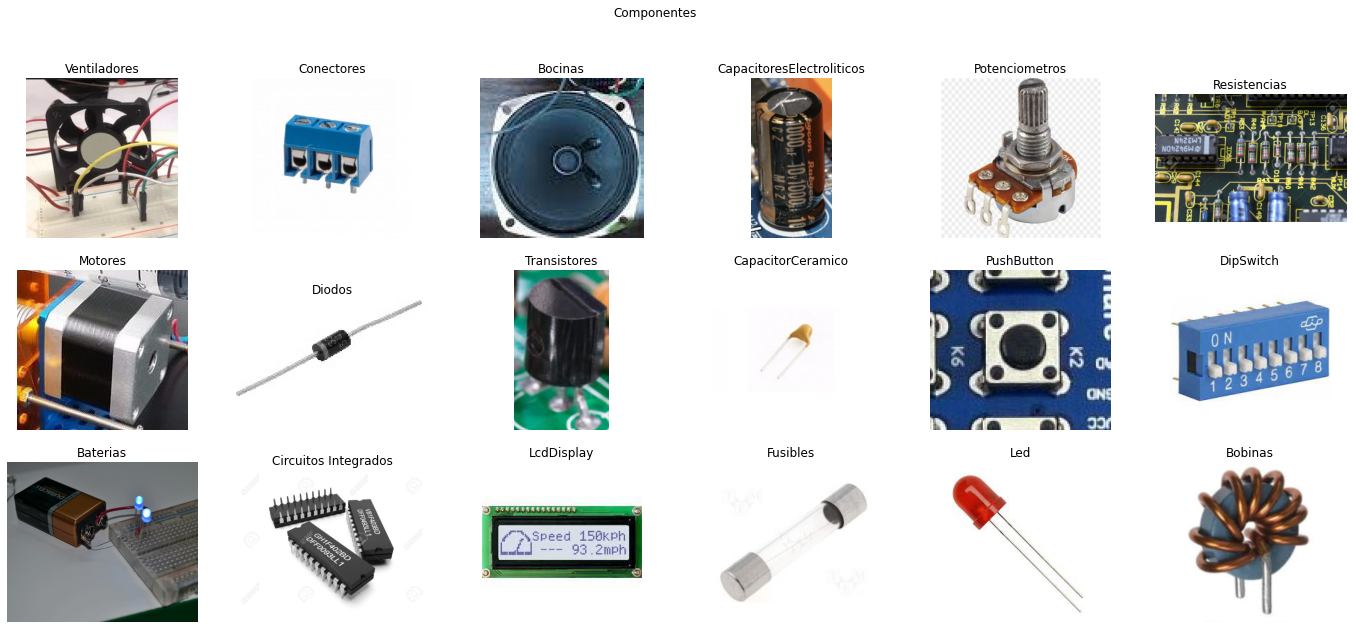

In [10]:
ROWS = 3
COLS = 6
path = 0
amount_images = np.zeros(len(listadoComponentesFoto))

fig, ax = plt.subplots(3, 6, figsize = (24, 10))
for i in range(ROWS):
    for j in range(COLS):
        pics = os.listdir(dirData + 'ComponentesFotos/'+ listadoComponentesFoto[path])
        amount_images[path] = len(pics)
        index = np.random.randint(len(pics))
        ax[i][j].imshow(Image.open(dirData  + 'ComponentesFotos/'+  listadoComponentesFoto[path] + '/' +pics[index]))
        ax[i][j].axis('off')
        ax[i][j].set_title(' '.join(listadoComponentesFoto[path].split('_')).replace('/', ''))
        path += 1

        if (path > 17):
            break

fig.suptitle('Componentes')

plt.show()


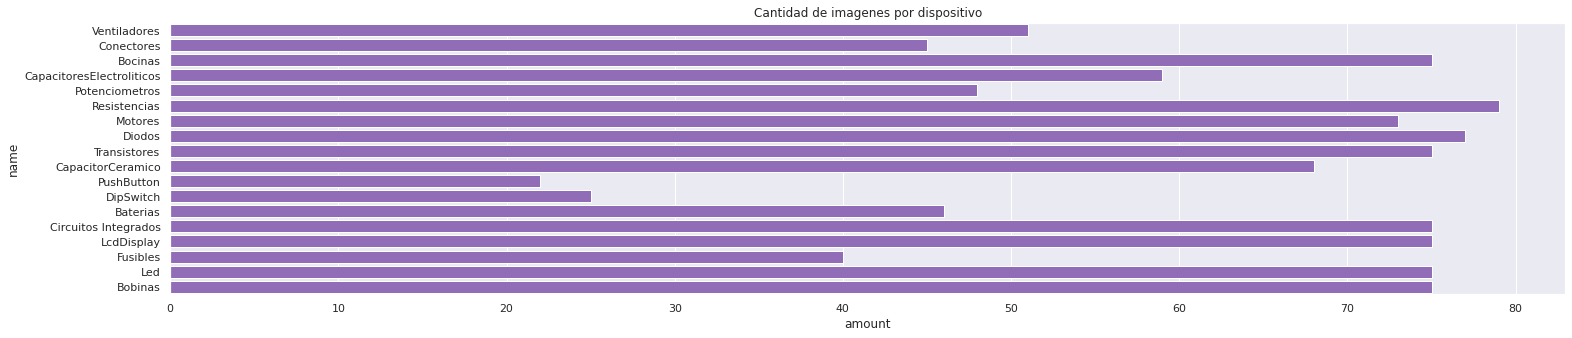

In [11]:

data = {
    'name' : [' '.join(path.split('_')).replace('/', '') for path in listadoComponentesFoto],
    'amount' : amount_images
}

df = pd.DataFrame(data)

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

sns.barplot(
    x = 'amount', 
    y = 'name',
    data = df, 
    estimator = sum, 
    ci = None, 
    color = '#9061C2').set_title('Cantidad de imagenes por dispositivo');

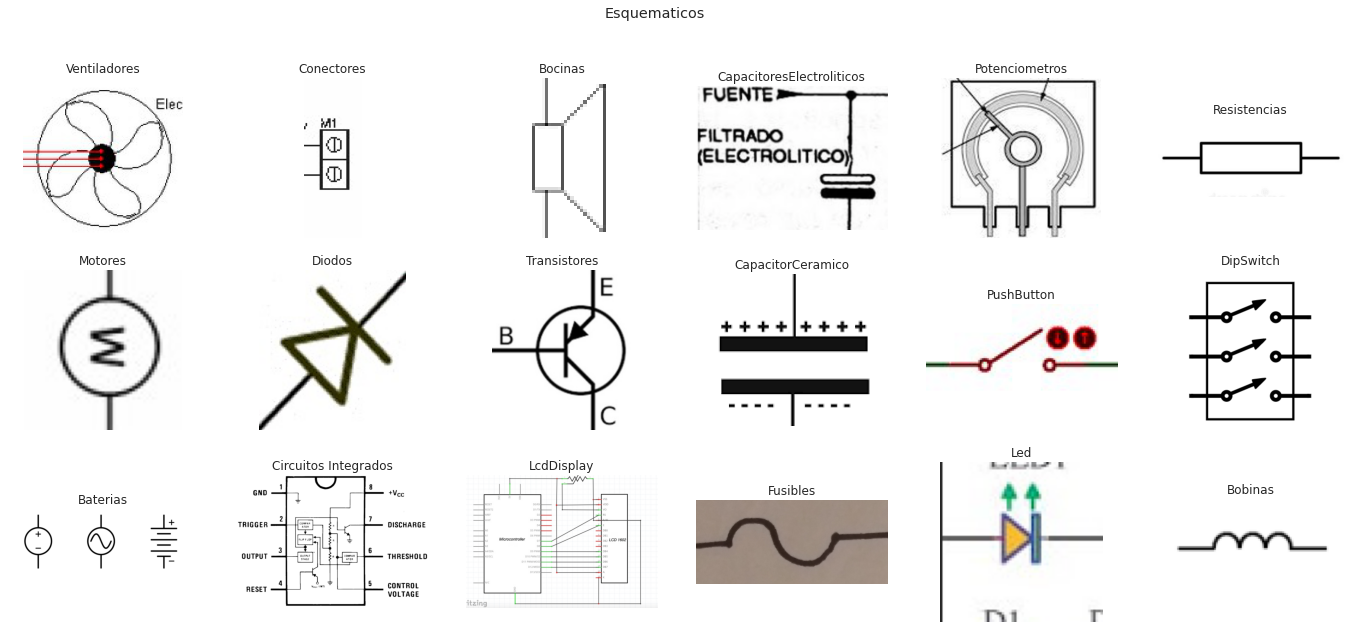

In [12]:
ROWS = 3
COLS = 6
path = 0
amount_images = np.zeros(len(listadoComponentesEsquematico))

fig, ax = plt.subplots(3, 6, figsize = (24, 10))
for i in range(ROWS):
    for j in range(COLS):
        pics = os.listdir(dirData + 'ComponentesEsquematicos/'+ listadoComponentesEsquematico[path])
        amount_images[path] = len(pics)
        index = np.random.randint(len(pics))
        ax[i][j].imshow(Image.open(dirData  + 'ComponentesEsquematicos/'+  listadoComponentesEsquematico[path] + '/' +pics[index]))
        ax[i][j].axis('off')
        ax[i][j].set_title(' '.join(listadoComponentesEsquematico[path].split('_')).replace('/', ''))
        path += 1

        if (path > 17):
            break

fig.suptitle('Esquematicos')

plt.show()

In [13]:
dirData + 'ComponentesFotos/'

'/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/'

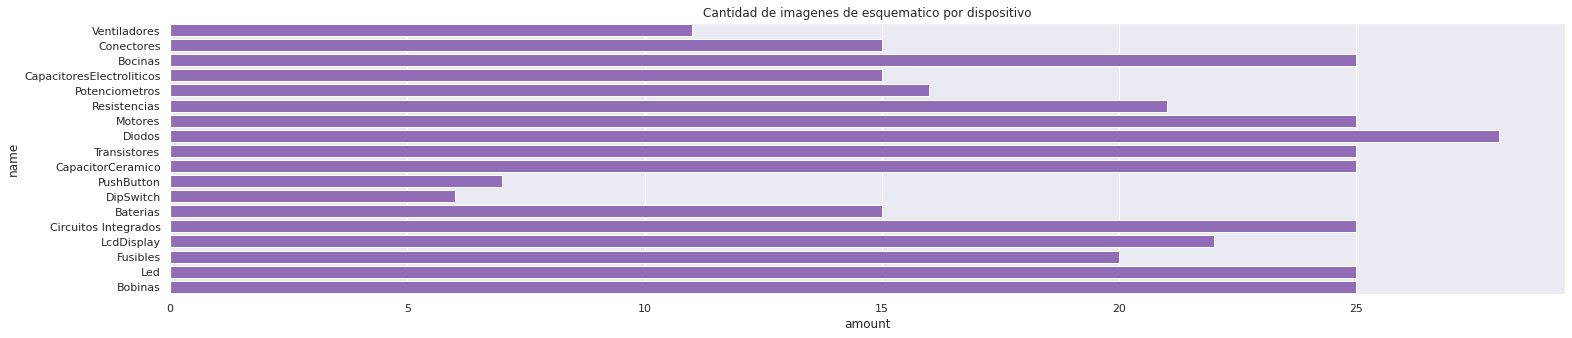

In [14]:
data = {
    'name' : [' '.join(path.split('_')).replace('/', '') for path in listadoComponentesEsquematico],
    'amount' : amount_images
}

df = pd.DataFrame(data)

sns.set(style="darkgrid")
plt.figure(figsize=(25, 5))

sns.barplot(
    x = 'amount', 
    y = 'name',
    data = df, 
    estimator = sum, 
    ci = None, 
    color = '#9061C2').set_title('Cantidad de imagenes de esquematico por dispositivo');

Como se puede observar nuestrio data set se encuentra relativamente balanceado, aunque tomando en cuenta las diferencias entre fotos y esquematico se ha tomado como opcion separar los esquematicos de los componentes

Primero limpiamos los datos para evitar problemas con archivos que no sean imagenes

In [15]:
def is_image(filename, verbose=False):

    data = open(filename,'rb').read(10)

    # check if file is JPG or JPEG
    if data[:3] == b'\xff\xd8\xff':
        if verbose == True:
             print(filename+" is: JPG/JPEG.")
    else:
      if data[:8] == b'\x89\x50\x4e\x47\x0d\x0a\x1a\x0a':
        if verbose == True:
             print(filename+" is: PNG.")
      else:
        print(filename + ' not is jpg')
      
      
      return True
    return False

In [16]:
for i in range(len(listadoComponentesFoto)):
  files = os.listdir(dirData +'ComponentesFotos/' +listadoComponentesFoto[i])
  
  for j in range(len(files)):
    is_image(dirData +'ComponentesFotos/'+listadoComponentesFoto[i] + '/' + files[j])

/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_87.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_3.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_8.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_9.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_5.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_18.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Motores/motor_15.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Transistores/Transistor2.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Transistores/Transistor3.jpg not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/CapacitorC

In [17]:
dirData

'/content/ProyectoFinalRedesNeuronalesAvanzadas/data/'

In [18]:
folder = dirData + 'ComponentesFotos/Circuitos Integrados/'
for filename in os.listdir(folder):
     # check if file is actually an image file
     if is_image(folder + filename, verbose=False):
          # if the file is not valid, remove it
          os.remove(folder + filename)

/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Circuitos Integrados/fondo_blanco_18.webp not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Circuitos Integrados/circuito_impreso_19.webp not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Circuitos Integrados/protoboard_02.webp not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Circuitos Integrados/fondo_blanco_24.webp not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Circuitos Integrados/protoboard_11.webp not is jpg
/content/ProyectoFinalRedesNeuronalesAvanzadas/data/ComponentesFotos/Circuitos Integrados/protoboard_07.webp not is jpg


In [19]:
def load_image(filename, path, resize, comp):        
    inimg = tf.cast(tf.image.decode_image(tf.io.read_file(dirData + comp + path + '/' + filename)), tf.float32)[..., :3]/255            

    inimg = tf.image.resize(inimg, (resize, resize))    
    inimg = color.rgb2gray(inimg)
    inimg = inimg[..., np.newaxis]

    return inimg

In [20]:
def PreprocesarData(size,tipo,dispositivos):
  os.chdir(dir)

  try:
    os.chdir( dir+'dataPreprocesada/')  
  except FileNotFoundError:
    os.mkdir( dir+'dataPreprocesada/')
    os.chdir( dir+'dataPreprocesada/')
  
  try:
    os.chdir( dir+'dataPreprocesada/'+tipo)  
  except FileNotFoundError:
    os.mkdir( dir+'dataPreprocesada/'+tipo)
    os.chdir( dir+'dataPreprocesada/'+tipo)
  
  for dispositivo in dispositivos:
    #Por cada tipo realizaremos el número de carpeta correspondiente
    try:
      os.chdir( dir+'dataPreprocesada/'+tipo+'/'+dispositivo)  
    except FileNotFoundError:
      os.mkdir( dir+'dataPreprocesada/'+tipo+'/'+dispositivo)
      os.chdir( dir+'dataPreprocesada/'+tipo+'/'+dispositivo)
    #Con la carpeta destino creada nos movemos a la ubicación de las imagenes

    os.chdir(dir+'data/'+tipo+'/'+dispositivo +'/') #Se supone existe
    print('Actualmente en: ',tipo+', '+dispositivo)
    
    imagenes = os.listdir()
  
    #Acumuladores de datos procesados
    x_v=[]
    y_v=[]
    for imagenName in imagenes:
  
      imagen = Image.open(imagenName)
      imagen2 = imagen.convert('RGB') #Todo a RGB
      
      a,b=imagen2.size
      if a!=b: #Si no coincide el ancho/largo
        if a>b:
          #nuevo fondo
          im = Image.new('RGB', (a, a), (255, 255, 255)) 
          im.paste(imagen2, (0,0))
        else:
          #nuevo fondo
          im = Image.new('RGB', (b, b), (255, 255, 255))
          im.paste(imagen2, (0,0))
      else:
        im = imagen2 #Por si sí es cuadrada

      im = im.resize((size,size))  #Escalar
      
      imagen3 = np.array(im)
      imagen3 = imagen3/255 #Normalizado
      x_v.append(imagen3) 

    y_v.append(dispositivo)
    y_v=y_v*len(x_v) #Número de veces que se debe repetir el target
    x_v=np.array(x_v)
    y_v=np.array(y_v)
  
    os.chdir(dir +'dataPreprocesada/' + tipo + '/'+dispositivo) 
    pickle.dump(x_v, open(dispositivo+"Data", 'wb'))
    pickle.dump(y_v, open(dispositivo+"Target", 'wb'))

In [21]:
PreprocesarData(64, 'ComponentesFotos', listadoComponentesFoto)

Actualmente en:  ComponentesFotos, Ventiladores
Actualmente en:  ComponentesFotos, Conectores
Actualmente en:  ComponentesFotos, Bocinas
Actualmente en:  ComponentesFotos, CapacitoresElectroliticos
Actualmente en:  ComponentesFotos, Potenciometros
Actualmente en:  ComponentesFotos, Resistencias
Actualmente en:  ComponentesFotos, Motores
Actualmente en:  ComponentesFotos, Diodos
Actualmente en:  ComponentesFotos, Transistores
Actualmente en:  ComponentesFotos, CapacitorCeramico
Actualmente en:  ComponentesFotos, PushButton
Actualmente en:  ComponentesFotos, DipSwitch
Actualmente en:  ComponentesFotos, Baterias
Actualmente en:  ComponentesFotos, Circuitos Integrados
Actualmente en:  ComponentesFotos, LcdDisplay
Actualmente en:  ComponentesFotos, Fusibles


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Actualmente en:  ComponentesFotos, Led
Actualmente en:  ComponentesFotos, Bobinas


In [22]:
PreprocesarData(64, 'ComponentesEsquematicos', listadoComponentesEsquematico)

Actualmente en:  ComponentesEsquematicos, Ventiladores
Actualmente en:  ComponentesEsquematicos, Conectores
Actualmente en:  ComponentesEsquematicos, Bocinas
Actualmente en:  ComponentesEsquematicos, CapacitoresElectroliticos
Actualmente en:  ComponentesEsquematicos, Potenciometros
Actualmente en:  ComponentesEsquematicos, Resistencias
Actualmente en:  ComponentesEsquematicos, Motores
Actualmente en:  ComponentesEsquematicos, Diodos
Actualmente en:  ComponentesEsquematicos, Transistores
Actualmente en:  ComponentesEsquematicos, CapacitorCeramico
Actualmente en:  ComponentesEsquematicos, PushButton
Actualmente en:  ComponentesEsquematicos, DipSwitch
Actualmente en:  ComponentesEsquematicos, Baterias
Actualmente en:  ComponentesEsquematicos, Circuitos Integrados


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Actualmente en:  ComponentesEsquematicos, LcdDisplay
Actualmente en:  ComponentesEsquematicos, Fusibles
Actualmente en:  ComponentesEsquematicos, Led
Actualmente en:  ComponentesEsquematicos, Bobinas


In [23]:
!zip -r file.zip /content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/

  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ (stored 0%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/ (stored 0%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Ventiladores/ (stored 0%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Ventiladores/VentiladoresTarget (deflated 93%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Ventiladores/VentiladoresData (deflated 87%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Conectores/ (stored 0%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Conectores/ConectoresTarget (deflated 91%)
  adding: content/ProyectoFinalRedesNeuronalesAvanzadas/dataPreprocesada/ComponentesFotos/Conectores/ConectoresData (deflated 88%)
  adding: content/ProyectoFinalRedesNeuronale

In [33]:
def CargadorDatos(tipo,dispositivos,direccion):
  x_test =[]
  x_train=[]
  y_test =[]
  y_train=[]
  
  for dispositivo in dispositivos:

    os.chdir(direccion+'/'+tipo+'/'+dispositivo)
    data = pickle.load(open(dispositivo+'Data','rb')) 

    x_train_v , x_test_v = train_test_split(data, test_size=0.20,shuffle=True)

    x_train.extend( x_train_v )
    
    x_test.extend( x_test_v )

    y_train.extend([str(dispositivo)]*len(x_train_v)*1 )
    y_test.extend( [str(dispositivo)]*len(x_test_v)*1)
  return np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)

In [29]:
os.chdir(dir)

In [30]:
#Tensorboard
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

train_log_dir = 'logs/gradient_tape/'  + current_time + '/train'
test_log_dir  = 'logs/gradient_tape/'  + current_time + '/test'

train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer  = tf.summary.create_file_writer(test_log_dir)

Carga de datos de componentes en foto

In [35]:
direccion = dir + 'dataPreprocesada'
x_train,x_test,y_train,y_test = CargadorDatos('ComponentesFotos',listadoComponentesFoto,direccion)

In [36]:
#Forma de los datos
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((854, 64, 64, 3), (219, 64, 64, 3), (854,), (219,))

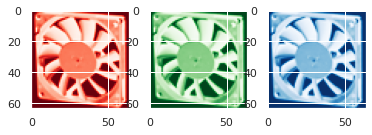

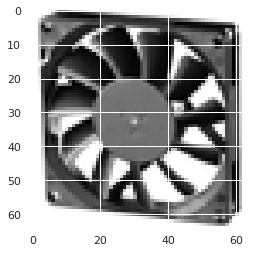

In [45]:
ex=x_train[5]

fig2 = plt.figure(figsize=(6,10))
ax   = fig2.add_subplot(1,3,1)
ax.imshow(ex[:,:,0],cmap='Reds')
ax   = fig2.add_subplot(1,3,2)
ax.imshow(ex[:,:,1],cmap='Greens')
ax   = fig2.add_subplot(1,3,3)
ax.imshow(ex[:,:,2],cmap='Blues')

fig3 = plt.figure()
plt.imshow(ex)

In [48]:
#Aplicando one-hot y shuffle

onehot_encoderC = OneHotEncoder(sparse=False)

y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoderC.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoderC.fit_transform(y_test)

x_trainC, y_trainC, y_train_onehotC = shuffle(x_train, y_train, y_train_onehot, random_state=None)
x_testC,  y_testC,  y_test_onehotC  = shuffle(x_test,  y_test,  y_test_onehot,  random_state=None)

In [50]:
class CNN_Model(object):
  def __init__(self, clases ): 
      # Capas convolucionales

    amp=0.001 #amplitud del rand

    #3 convolucionales paralelas entre sí

    self.h1LW_A = tf.Variable(amp*np.random.randn(9,9,3,8),name="hl1_Aweigths",dtype="float32")
    self.h1LB_A = tf.Variable(amp*np.random.randn(8),name="hl1_Abias",dtype="float32")

    self.h1LW_B = tf.Variable(amp*np.random.randn(2,7,3,8),name="hl1_Bweigths",dtype="float32")
    self.h1LB_B = tf.Variable(amp*np.random.randn(8),name="hl1_Bbias",dtype="float32")

    self.h1LW_C = tf.Variable(amp*np.random.randn(7,2,3,8),name="hl1_Cweigths",dtype="float32")
    self.h1LB_C = tf.Variable(amp*np.random.randn(8),name="hl1_Cbias",dtype="float32")

  
        #MAX pooling (no tiene pesos)

        #Convolución con 16 filtros
    self.h2LW = tf.Variable(amp*np.random.randn(5,5,8*3,16),name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(amp*np.random.randn(16),name="hl2bias",dtype="float32")
    

        #MAX pooling (no tiene pesos)

        #Flatten final
    self.h3LW = tf.Variable(amp*np.random.randn(16*16*16,512),name="hl3weigths",dtype="float32")
    self.h3LB = tf.Variable(amp*np.random.randn(512),name="hl3bias",dtype="float32")
  

      #Capas completamente conectadas
        #Primera reducción
    self.outW = tf.Variable(amp*np.random.rand(512, clases),name="outweigths",dtype="float32")
    self.outB = tf.Variable(amp*np.random.rand(clases),name="outbias",dtype="float32")
  
    self.trainable_variables =[self.h1LW_A,self.h1LB_A,
                               self.h1LW_B,self.h1LB_B,
                               self.h1LW_C,self.h1LB_C,
                               self.h2LW,self.h2LB,
                               self.h3LW,self.h3LB,
                               self.outW,self.outB]

  
  def __call__(self,x,rate1=0,rate2=0):
      x   = tf.cast(x, tf.float32) 
      img = tf.reshape(x, shape=[-1, 64, 64, 3])  #Reshape con: batch, ancho, alto, colores 

     
      # Primer Convolucional 
      l1_A = tf.nn.conv2d(img, self.h1LW_A, strides=[1,1,1,1], padding='SAME' )  
      #Salto entre batches, [espacial, espacial], filtro/color  
      l1_A = tf.add(l1_A, self.h1LB_A)
      l1_A = tf.nn.relu(l1_A)
      l1_A = tf.nn.max_pool(l1_A, ksize=2, strides=2, padding='SAME' )
      l1_A = self.Normalizar(l1_A)

      
       #Segunda convolucional paralela
      l1_B = tf.nn.conv2d(img, self.h1LW_B, strides=[1,1,1,1], padding='SAME' )  
      #Salto entre batches, [espacial, espacial], filtro/color        
      l1_B = tf.add(l1_B, self.h1LB_B)
      l1_B = tf.nn.relu(l1_B)
      l1_B = tf.nn.max_pool(l1_B, ksize=2, strides=2, padding='SAME' )
      l1_B = self.Normalizar(l1_B)

        #Tercera convolucional paralela
      l1_C = tf.nn.conv2d(img, self.h1LW_C, strides=[1,1,1,1], padding='SAME' )  
      #Salto entre batches, [espacial, espacial], filtro/color        
      l1_C = tf.add(l1_C, self.h1LB_C)
      l1_C = tf.nn.relu(l1_C)
      l1_C = tf.nn.max_pool(l1_C, ksize=2, strides=2, padding='SAME' )
      l1_C = self.Normalizar(l1_C)


      l1 = tf.concat([l1_A,l1_B,l1_C],3)
      l1 = tf.nn.dropout(l1,rate1)  
         
      l2 = tf.nn.conv2d(l1,self.h2LW, strides=[1,1,1,1], padding='SAME')  
      l2 = tf.add(l2, self.h2LB)
      l2 = tf.nn.relu(l2)
      l2 = tf.nn.max_pool(l2, ksize=2, strides=2, padding='SAME')
      l2 = self.Normalizar(l2)
      l2 = tf.nn.dropout(l2,rate1)  

      l3 = tf.reshape(l2,[-1, 16*16*16])
      l3 = tf.add(tf.matmul(l3,self.h3LW),self.h3LB)
      l3 = tf.nn.relu(l3)
      
      l3 = self.Normalizar(l3)

      l3 = tf.nn.dropout(l3,rate2)    
   
      output = tf.add( tf.matmul(l3,self.outW) , self.outB)


      return output 

  
  def Normalizar(self, layerIn):
      f = tf.reduce_max(abs(layerIn))
      m = tf.reduce_mean(layerIn)
      s = tf.math.reduce_std(layerIn)
      return (layerIn-m)/(s*f)

In [52]:
#Prueba de propagación hacía adelante e instancia de ambas redes
CNN_Componentes = CNN_Model(clases = len(listadoComponentesFoto))

CNN_Componentes(x_train[10])

<tf.Tensor: shape=(1, 18), dtype=float32, numpy=
array([[ 0.39840487,  0.36531886,  0.02803669,  0.03758057, -0.00813044,
        -0.09454548, -0.62718374, -0.15930332, -0.19234118, -0.43918863,
         0.01034353, -0.16846287,  0.25390533, -0.493891  ,  0.44446352,
         0.5812064 ,  0.23306286,  0.6377449 ]], dtype=float32)>

In [53]:
#Metricas 
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

optimizador = tf.compat.v1.train.AdamOptimizer( learning_rate=0.05,epsilon= 1e-10)

In [54]:
#@tf.function
def TrainingStep(model, tdata, etiquetas,rate1,rate2,lamb):  
  with tf.GradientTape() as tape:

    prediction = model(tdata,rate1,rate2)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(etiquetas,prediction))
    # tf.reduce_sum([ tf.reduce_sum(CNN1.trainable_variables[i]**2) for i in range(len(CNN1.trainable_variables))])
    loss += lamb*tf.reduce_sum([ tf.reduce_sum(model.trainable_variables[i]**2) for i in range(len(model.trainable_variables))])

  gradients = tape.gradient(loss, model.trainable_variables)  #Con que sacar gradiente
  capped_grad_and_vars = [(grad,model.trainable_variables[index]) for index,grad in enumerate(gradients)] #Elementos a modificar
  optimizador.apply_gradients(capped_grad_and_vars) #Modificar
  
  train_loss(loss)
  train_accuracy(etiquetas, prediction)

In [55]:
#@tf.function
def TestStep(model,tdata, etiquetas,lamb):
  predictions = model(tdata)

  t_loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(etiquetas, predictions))
  t_loss += lamb*tf.reduce_sum([ tf.reduce_sum(model.trainable_variables[i]**2) for i in range(len(model.trainable_variables))])
  
  test_loss(t_loss)
  test_accuracy(etiquetas, predictions)

In [57]:
def fitting(model,train_x,train_y,test_x,test_y,
            epochs,batchSize,
            rate1,rate2,
            lamb):
  
  for epoch in range(epochs):
    i=0
    
    #Bucle del training step
      #agregando suffle, diferentes batches cada vez
    train_x,train_y = shuffle(train_x,train_y, random_state=None)
    while i<len(train_x):
      start = i

      if (i+batchSize)<len(train_x):
        end = i+batchSize  
      else:
        end = len(train_x)
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      
      TrainingStep( model, batch_x, batch_y, rate1,rate2,lamb)
      
      #Guardado
      with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss.result(), step=epoch)
        tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)

      i+=batchSize

    TestStep( model,test_x,test_y,lamb )

    #Guardado 
    with test_summary_writer.as_default():
      tf.summary.scalar('loss', test_loss.result(), step=epoch)
      tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
      

    #Resultadis
    template = 'Epoch {0}, Perdida: {1:.3f}, Exactitud: {2:.3f}, Perdida de prueba: {3:.3f}, Exactitud de prueba: {4:.3f}'
    if (epoch+1)%5==0:
      print(template.format(epoch+1,
                        train_loss.result().numpy(),
                        train_accuracy.result().numpy()*100,
                        test_loss.result().numpy(),
                        test_accuracy.result().numpy()*100    )   )
    
    #Early stopping
    if( train_accuracy.result().numpy()>0.95 and test_accuracy.result().numpy()>0.70 ):
      print('stop')
      break;
      
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

In [58]:
#Detalles de variables a entrenar:
for tensor in CNN_Componentes.trainable_variables:
  print(tensor.shape,   np.sum (  tensor.value()  )  , np.max(tensor.value()) , np.min(tensor.value() ))

(9, 9, 3, 8) -0.021530678 0.0035573454 -0.0030844407
(8,) 0.00022249826 0.0014076425 -0.0014368285
(2, 7, 3, 8) -0.0078011923 0.0027374427 -0.0024341373
(8,) -0.001479073 0.0008780412 -0.0014711326
(7, 2, 3, 8) -0.021459604 0.002382426 -0.003623501
(8,) 0.003512041 0.001829301 -0.0010364588
(5, 5, 24, 16) 0.008019302 0.0042536044 -0.0032904446
(16,) -0.0014324402 0.0014183621 -0.0015995237
(4096, 512) 3.3639717 0.0053656753 -0.005015249
(512,) 0.005347043 0.0029672647 -0.0030504193
(512, 18) 4.5982056 0.0009999949 1.349546e-07
(18,) 0.011572878 0.0009970671 4.886842e-06


In [114]:
os.chdir(dir) #Subimos a directorio principal para cargar de aquí el modelo
CNN_C = [pickle.load(open('CNN_Componentes_Modelo_3', 'rb'))]

In [107]:
fitting( CNN_Componentes,x_trainC,y_train_onehotC, x_testC,y_test_onehotC,
        epochs= 20, batchSize = 16,
        rate1 = 0.5, rate2=0.4,
        lamb=1e-6)

Epoch 5, Perdida: 2.239, Exactitud: 90.398, Perdida de prueba: 4.302, Exactitud de prueba: 38.356
Epoch 10, Perdida: 2.245, Exactitud: 92.272, Perdida de prueba: 4.652, Exactitud de prueba: 44.749
Epoch 15, Perdida: 2.115, Exactitud: 95.082, Perdida de prueba: 4.152, Exactitud de prueba: 43.379
Epoch 20, Perdida: 2.227, Exactitud: 92.272, Perdida de prueba: 4.718, Exactitud de prueba: 42.466


In [115]:
dispositivosC = onehot_encoderC.categories_[0]

fig3 = plt.figure(figsize=(14,14))
XC=np.concatenate([x_testC,x_trainC])
YC=np.concatenate([y_test_onehotC,y_train_onehotC])

#Nueve ejemplos 
for i in range(3):
  for j in range (3):
    value = np.random.randint(0,len(XC))
    ejemplo = XC[value]
    v       = np.array( CNN_C(ejemplo) )
    d       = np.sort(v)[0] #Ordenamiento, los últimos son los más probables de pertenecer
    
    prediccion  = np.argmax(d[-1]==v)
    verdadero   = np.argmax(YC[value])

    ax   = fig3.add_subplot(3,3,i*3+(j+1))
    ax.imshow(ejemplo)
    ax.axis('off')
    label='True:'+ str(dispositivosC[verdadero]) + \
     '\n Predic:'+ str(dispositivosC[prediccion]) 
    ax.set_title(label )

TypeError: ignored

<Figure size 1008x1008 with 0 Axes>

In [113]:
#Matriz de confusión
y_test_pred = np.argmax( CNN_C(XC), axis=1)

y_test_true  = np.argmax(YC, axis=1)
confusionM = confusion_matrix(y_test_true, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(confusionM , cmap='hot')

ax.set_xticks([])
ax.set_yticks([])

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('similitud', rotation=-90, va="bottom")

plt.show()

TypeError: ignored

In [86]:
direccion = dir+'dataPreprocesada'

x_train,x_test,y_train,y_test = CargadorDatos('ComponentesEsquematicos',listadoComponentesEsquematico,direccion)

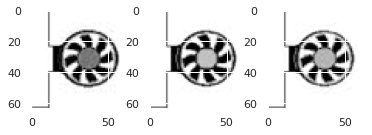

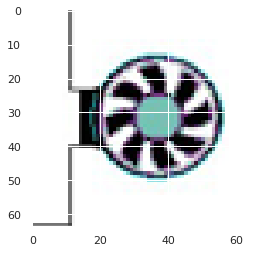

In [88]:
#Input
ex=x_train[5]

fig2 = plt.figure(figsize=(6,10))
ax   = fig2.add_subplot(1,3,1)
ax.imshow(ex[:,:,0],cmap='gray')
ax   = fig2.add_subplot(1,3,2)
ax.imshow(ex[:,:,1],cmap='gray')
ax   = fig2.add_subplot(1,3,3)
ax.imshow(ex[:,:,2],cmap='gray')

fig3 = plt.figure()
plt.imshow(ex)

In [89]:

onehot_encoderE = OneHotEncoder(sparse=False)

y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoderE.fit_transform(y_train)


y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoderE.fit_transform(y_test)

In [90]:
x_trainE, y_trainE, y_train_onehotE = shuffle(x_train, y_train, y_train_onehot, random_state=None)
x_testE,  y_testE,  y_test_onehotE  = shuffle(x_test,  y_test,  y_test_onehot,  random_state=None)

In [91]:
class CNN_Model2(object):
  def __init__(self, clases ): 
      # Capas convolucionales

    amp=0.001 #amplitud del rand

    #3 convolucionales paralelas entre sí

    self.h1LW_A = tf.Variable(amp*np.random.randn(3,3,3,8),name="hl1_Aweigths",dtype="float32")
    self.h1LB_A = tf.Variable(amp*np.random.randn(8),name="hl1_Abias",dtype="float32")

    self.h1LW_B = tf.Variable(amp*np.random.randn(1,5,3,8),name="hl1_Bweigths",dtype="float32")
    self.h1LB_B = tf.Variable(amp*np.random.randn(8),name="hl1_Bbias",dtype="float32")

    self.h1LW_C = tf.Variable(amp*np.random.randn(5,1,3,8),name="hl1_Cweigths",dtype="float32")
    self.h1LB_C = tf.Variable(amp*np.random.randn(8),name="hl1_Cbias",dtype="float32")

  
        #MAX pooling (no tiene pesos)

        #Convolución con 16 filtros
    self.h2LW = tf.Variable(amp*np.random.randn(3,3,8*3,16),name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(amp*np.random.randn(16),name="hl2bias",dtype="float32")
    

        #MAX pooling (no tiene pesos)

        #Flatten final
    self.h3LW = tf.Variable(amp*np.random.randn(16*16*16,512),name="hl3weigths",dtype="float32")
    self.h3LB = tf.Variable(amp*np.random.randn(512),name="hl3bias",dtype="float32")
  
    

      #Capas completamente conectadas
        #Primera reducción
    self.outW = tf.Variable(amp*np.random.rand(512, clases),name="outweigths",dtype="float32")
    self.outB = tf.Variable(amp*np.random.rand(clases),name="outbias",dtype="float32")
    
    #Para el grafo computacional, variables a entrenar:
    self.trainable_variables =[self.h1LW_A,self.h1LB_A,
                               self.h1LW_B,self.h1LB_B,
                               self.h1LW_C,self.h1LB_C,
                               self.h2LW,self.h2LB,
                               self.h3LW,self.h3LB,
                               self.outW,self.outB]

  
  def __call__(self,x,rate1=0,rate2=0):
      x   = tf.cast(x, tf.float32) #Volvemos float32 porque TF explota sino (? aver)
      img = tf.reshape(x, shape=[-1, 64, 64, 3])  #Reshape con: batch, ancho, alto, colores 
      # 64*64*3
     
      # Primer Convolucional 
      l1_A = tf.nn.conv2d(img, self.h1LW_A, strides=[1,1,1,1], padding='SAME' )  
      #Salto entre batches, [espacial, espacial], filtro/color  
    
      l1_A = tf.add(l1_A, self.h1LB_A)
      l1_A = tf.nn.relu(l1_A)
      l1_A = tf.nn.max_pool(l1_A, ksize=2, strides=2, padding='SAME' )
      l1_A = self.Normalizar(l1_A)
      # 32 * 32 * 16
      
       #Segunda convolucional paralela
      l1_B = tf.nn.conv2d(img, self.h1LW_B, strides=[1,1,1,1], padding='SAME' )  
      #Salto entre batches, [espacial, espacial], filtro/color        
      l1_B = tf.add(l1_B, self.h1LB_B)
      l1_B = tf.nn.relu(l1_B)
      l1_B = tf.nn.max_pool(l1_B, ksize=2, strides=2, padding='SAME' )
      l1_B = self.Normalizar(l1_B)
      # 32 * 32 * 16

        #Tercera convolucional paralela
      l1_C = tf.nn.conv2d(img, self.h1LW_C, strides=[1,1,1,1], padding='SAME' )  
      #Salto entre batches, [espacial, espacial], filtro/color        
      l1_C = tf.add(l1_C, self.h1LB_C)
      l1_C = tf.nn.relu(l1_C)
      l1_C = tf.nn.max_pool(l1_C, ksize=2, strides=2, padding='SAME' )
      l1_C = self.Normalizar(l1_C)
      
      # 32 * 32 * 16


      l1 = tf.concat([l1_A,l1_B,l1_C],3)
      l1 = tf.nn.dropout(l1,rate1)  


      #Concatenado de las tres paralelas 32*32*(16+16+16)
      
      
      l2 = tf.nn.conv2d(l1,self.h2LW, strides=[1,1,1,1], padding='SAME')  
      l2 = tf.add(l2, self.h2LB)
      l2 = tf.nn.relu(l2)
      l2 = tf.nn.max_pool(l2, ksize=2, strides=2, padding='SAME')
      l2 = self.Normalizar(l2)
      l2 = tf.nn.dropout(l2,rate1)  
      # 16 * 16 * 32
      
      #Capas completamente conectadas
      l3 = tf.reshape(l2,[-1, 16*16*16])
      l3 = tf.add(tf.matmul(l3,self.h3LW),self.h3LB)
      l3 = tf.nn.relu(l3)
      
      l3 = self.Normalizar(l3)

      l3 = tf.nn.dropout(l3,rate2)    
   
      
      output = tf.add( tf.matmul(l3,self.outW) , self.outB)
      #output = output/tf.reduce_max(output)


      return output 

  
  def Normalizar(self, layerIn):
      f = tf.reduce_max(abs(layerIn))
      m = tf.reduce_mean(layerIn)
      s = tf.math.reduce_std(layerIn)
      return (layerIn-m)/(s*f)

In [93]:
CNN_Esquematicos= CNN_Model2(clases = len(listadoComponentesEsquematico))

In [94]:
def fittingE(model,train_x,train_y,test_x,test_y,
            epochs,batchSize,
            rate1,rate2,
            lamb):


  #Mientras el valor de la epoca actual sea menor que la cantidad total de datos:
  for epoch in range(epochs):
    i=0
    
    #Bucle del training step
      #agregando suffle, diferentes batches cada vez
    train_x,train_y = shuffle(train_x,train_y, random_state=None)
    while i<len(train_x):
      start = i

      if (i+batchSize)<len(train_x):
        end = i+batchSize  
      else:
        end = len(train_x)
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      
      TrainingStep( model, batch_x, batch_y, rate1,rate2,lamb)

      i+=batchSize

    TestStep( model,test_x,test_y,lamb )

    #Presentación de resultados
    template = 'Epoch {0}, Perdida: {1:.3f}, Exactitud: {2:.3f}, Perdida de prueba: {3:.3f}, Exactitud de prueba: {4:.3f}'
    if (epoch+1)%5==0:
      print(template.format(epoch+1,
                        train_loss.result().numpy(),
                        train_accuracy.result().numpy()*100,
                        test_loss.result().numpy(),
                        test_accuracy.result().numpy()*100    )   )
    
    #Early stopping
    if( train_accuracy.result().numpy()>0.90 and test_accuracy.result().numpy()>0.60 ):
      print('stop')
      break;
      
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

In [99]:
os.chdir(dir) #Subimos a directorio principal para cargar de aquí el modelo
CNN_E = pickle.load(open('CNN_Esquematicos_Modelo_5', 'rb'))

In [101]:
fittingE( CNN_Esquematicos,x_trainE,y_train_onehotE, x_testE,y_test_onehotE,
        epochs= 20, batchSize = 16,
        rate1 = 0.6, rate2=0.3,
        lamb=1e-6)

Epoch 5, Perdida: 6.982, Exactitud: 6.159, Perdida de prueba: 6.996, Exactitud de prueba: 6.667
Epoch 10, Perdida: 6.850, Exactitud: 7.246, Perdida de prueba: 6.839, Exactitud de prueba: 6.667
Epoch 15, Perdida: 6.736, Exactitud: 7.609, Perdida de prueba: 6.744, Exactitud de prueba: 6.667
Epoch 20, Perdida: 6.596, Exactitud: 16.667, Perdida de prueba: 6.682, Exactitud de prueba: 9.333


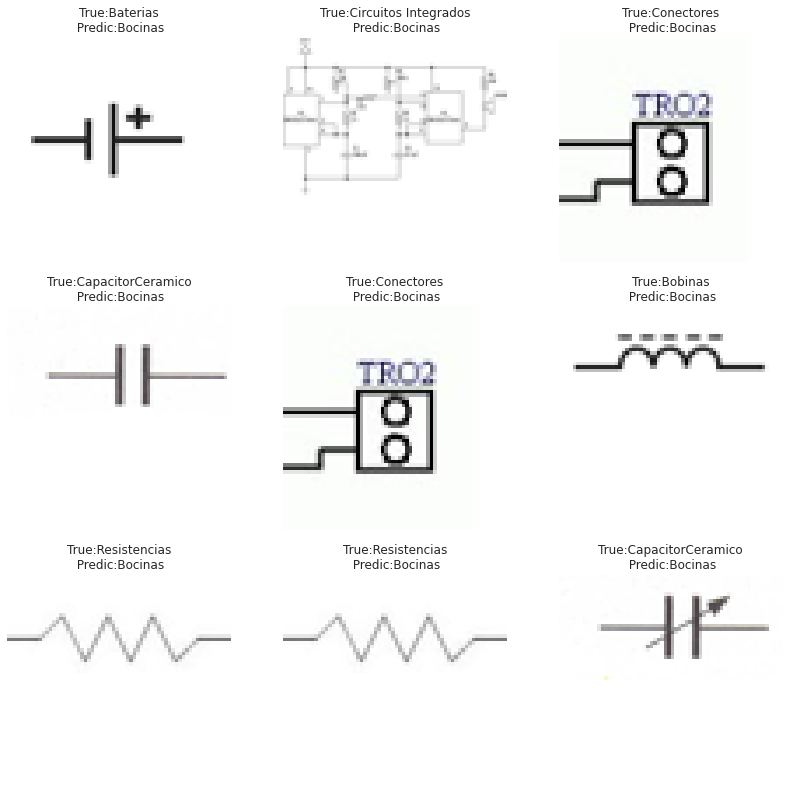

In [103]:
dispositivosE = onehot_encoderE.categories_[0]
XE=np.concatenate([x_testE,x_trainE])
YE=np.concatenate([y_test_onehotE,y_train_onehotE])
fig4 = plt.figure(figsize=(14,14))


#Nueve ejemplos 
for i in range(3):
  for j in range (3):
    value = np.random.randint(0,len(x_testE))
    ejemplo = XE[value]
    v       = np.array( CNN_E(ejemplo) )
    d       = np.sort(v)[0] #Ordenamiento, los últimos son los más probables de pertenecer
    
    prediccion  = np.argmax(d[-1]==v)
    verdadero   = np.argmax(YE[value])

    ax   = fig4.add_subplot(3,3,i*3+(j+1))
    ax.imshow(ejemplo)
    ax.axis('off')
    label='True:'+ str(dispositivosE[verdadero]) + \
     '\n Predic:'+ str(dispositivosE[prediccion]) 
    ax.set_title(label )

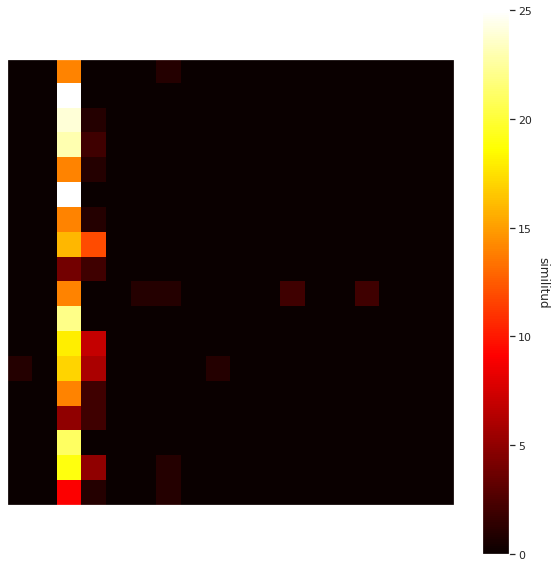

In [110]:
y_test_pred = np.argmax( CNN_E(XE), axis=1)
y_test_true  = np.argmax(YE, axis=1)
confusionM = confusion_matrix(y_test_true, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(confusionM , cmap='hot')

ax.set_xticks([])
ax.set_yticks([])

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('similitud', rotation=-90, va="bottom")

plt.show()


In [111]:
os.chdir(dir)
pickle.dump(CNN_Componentes, open('CNN_Componentes_Modelo_3', 'wb'))
pickle.dump(CNN_Esquematicos, open('CNN_Esquematicos_Modelo_5', 'wb'))